Firstly I will load in my training and test datasets

In [ ]:
import pandas as pd

training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"

#details for wildfire dataset
independent_cols = [ "year", "temp", "humidity", "rainfall", "drought_code", "buildup_index",  "day", "month", "wind_speed"]
dependent_col = ["fire"]

# Load in the training dataset
training_data = pd.read_csv(training_file, usecols=independent_cols + dependent_col)
print(training_data.head())
print(training_data.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [3]:
# set up a matrix X containing the independent variables from the training dataset
X_train = training_data.loc[:,independent_cols]
print(X_train.head())
print(X_train.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [5]:
# set up a vector y containing the dependent variable from the training dataset
y_train = training_data.loc[:, dependent_col]
print(y_train.head())
print(y_train.shape)

  fire
0   no
1   no
2   no
3   no
4   no
(154, 1)


In [6]:
# load test data
test_data = pd.read_csv(test_file)
print(test_data.head())
print(test_data.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [7]:
# set up a matrix X containing the independent variables from the test dataset
X_test = test_data.loc[:, independent_cols]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [8]:
# set up a vector y containing the dependent variable from the test dataset
y_test = test_data.loc[:, dependent_col]
print(y_test.head())
print(y_test.shape)

  fire
0   no
1  yes
2   no
3   no
4   no
(50, 1)


Now I'll build the model with the default values for the hyperparameters for logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# create a model with default hyperparameters for logistic regression penalty=l2 C=1.0 solver=lbfgs  
model = LogisticRegression(max_iter=1000) # setting max_iter to 1000 to ensure convergence
model.fit(X_train, y_train)

# make predictions on training and test datasets
predictions_training = model.predict(X_train)
predictions_test = model.predict(X_test)

# evaluate the model by checking accuracy on training and test datasets
accuracy_training = metrics.accuracy_score(y_train, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)
print("Training accuracy: ", accuracy_training)
print("Test accuracy: ", accuracy_test)

Training accuracy:  0.9090909090909091
Test accuracy:  0.9


Now I will explore using different values for C and see what results this will show

In [72]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

accuracy_training = []
accuracy_test = []
for c in c_values:
    try:
        model = LogisticRegression(C=c, max_iter=1000)
        model.fit(X_train, y_train)

        predictions_training = model.predict(X_train)
        predictions_test = model.predict(X_test)

        accuracy_training.append(metrics.accuracy_score(y_train, predictions_training))
        accuracy_test.append(metrics.accuracy_score(y_test, predictions_test))
        print(f"C: {c} => Training accuracy: {accuracy_training[-1]:.4f}, Test accuracy: {accuracy_test[-1]:.4f}")
    except Exception as e:
        print(f"C: {c} => Error: {e}")

C: 0.001 => Training accuracy: 0.8636, Test accuracy: 0.8200
C: 0.01 => Training accuracy: 0.8831, Test accuracy: 0.8400
C: 0.1 => Training accuracy: 0.8961, Test accuracy: 0.8200
C: 1 => Training accuracy: 0.9091, Test accuracy: 0.9000
C: 10 => Training accuracy: 0.9221, Test accuracy: 0.8800
C: 100 => Training accuracy: 0.9286, Test accuracy: 0.8600
C: 1000 => Training accuracy: 0.9221, Test accuracy: 0.8600


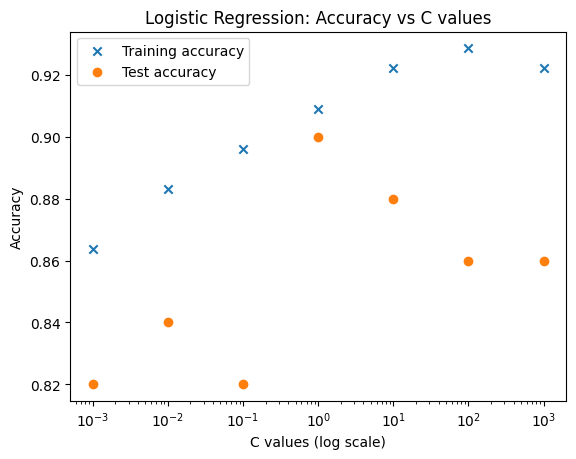

In [47]:
# let plot the accuracy on training and test datasets against the C values
import matplotlib.pyplot as plt
plt.scatter(c_values, accuracy_training, label="Training accuracy", marker='x')
plt.scatter(c_values, accuracy_test, label="Test accuracy", marker='o')
plt.xscale('log')
plt.xlabel('C values (log scale)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Accuracy vs C values')
plt.legend()
plt.show()

Now I will compare different values for solver and check for any changes in accuracy

In [48]:
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']
accuracy_training_solvers = []
accuracy_test_solvers = []
for solver in solver_values:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train, y_train)

        predictions_training = model.predict(X_train)
        predictions_test = model.predict(X_test)

        accuracy_training_solvers.append(metrics.accuracy_score(y_train, predictions_training))
        accuracy_test_solvers.append(metrics.accuracy_score(y_test, predictions_test))
        print(f"Solver: {solver} => Training accuracy: {accuracy_training_solvers[-1]:.4f}, Test accuracy: {accuracy_test_solvers[-1]:.4f}")
    except Exception as e:
        print(f"Solver: {solver} => Error: {e}")

Solver: newton-cg => Training accuracy: 0.9026, Test accuracy: 0.9000
Solver: lbfgs => Training accuracy: 0.9091, Test accuracy: 0.9000
Solver: liblinear => Training accuracy: 0.9091, Test accuracy: 0.9000
Solver: sag => Training accuracy: 0.8701, Test accuracy: 0.8200
Solver: saga => Training accuracy: 0.8701, Test accuracy: 0.8200
Solver: newton-cholesky => Training accuracy: 0.8896, Test accuracy: 0.9000


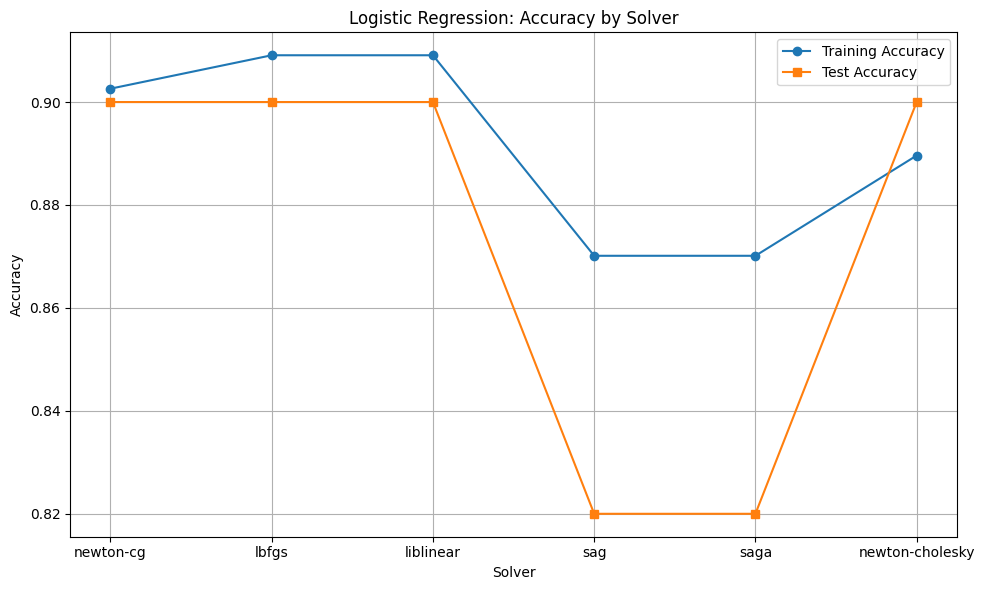

In [ ]:
# plot accuracy for different solvers using training and test datasets
plt.figure(figsize=(10, 6))
plt.plot(solver_values, accuracy_training_solvers, marker='o', label='Training Accuracy')
plt.plot(solver_values, accuracy_test_solvers, marker='s', label='Test Accuracy')

plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Accuracy by Solver')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Now I will compare the effects when both hyperparameters are tuned together and evaluate what results show

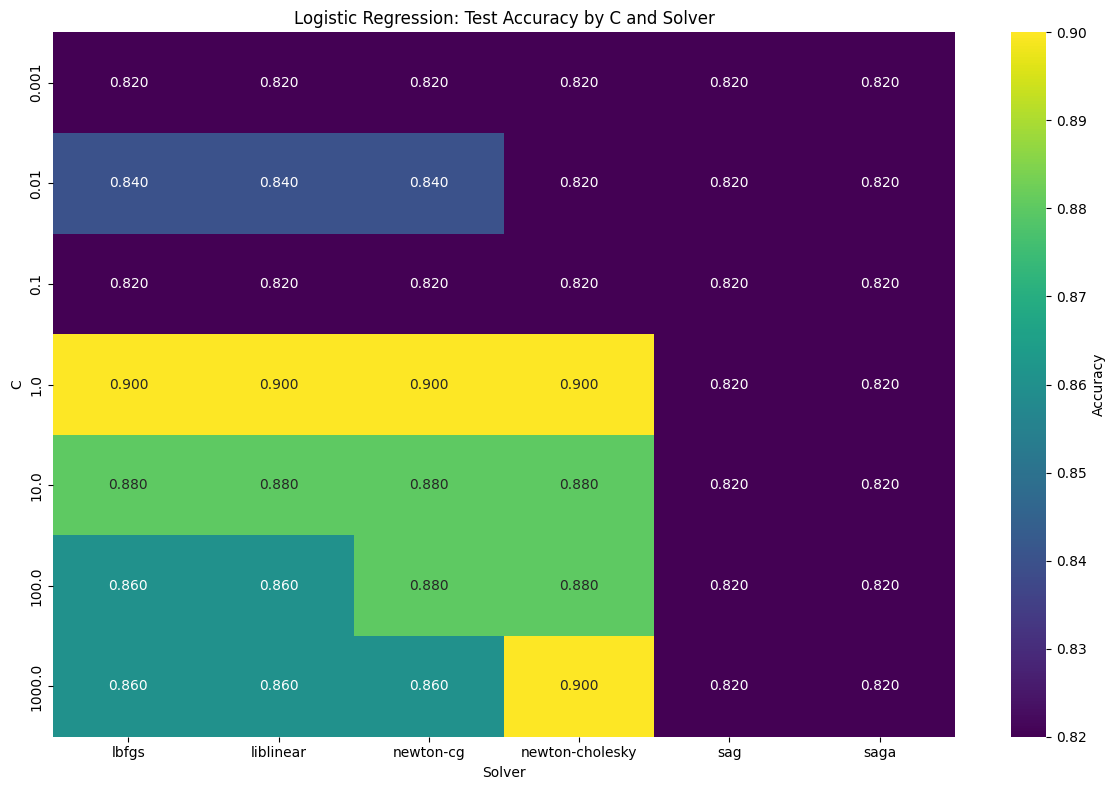

In [ ]:
import seaborn as sns

results = []
for c in c_values:
    for solver in solver_values:
        try:
            model = LogisticRegression(C=c, solver=solver, max_iter=1000)
            model.fit(X_train, y_train)

            predictions_training = model.predict(X_train)
            predictions_test = model.predict(X_test)

            acc_train = metrics.accuracy_score(y_train, predictions_training)
            acc_test = metrics.accuracy_score(y_test, predictions_test)
            results.append({"C": c, "Solver": solver, "Training Accuracy": acc_train, "Test Accuracy": acc_test})
        except Exception as e:
            results.append({"C": c, "Solver": solver, "Training Accuracy": None, "Test Accuracy": None})
            print(f"C: {c}, Solver: {solver} => Error: {e}")

results_df = pd.DataFrame(results)
pivot_table = results_df.pivot(index='C', columns='Solver', values='Test Accuracy')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Accuracy'}, fmt=".3f")
plt.title('Logistic Regression: Test Accuracy by C and Solver')
plt.xlabel('Solver')
plt.ylabel('C')
plt.tight_layout()
plt.show()